In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
air_df = wrangle.clean_air()
air_df.datetime = pd.to_datetime(air_df.datetime)
air_df = air_df.set_index('datetime')
air_df = air_df.sort_index()
air1_df = air_df[(air_df['Pm1_0'] < 500) & (air_df['Pm1_0'] > -50)]

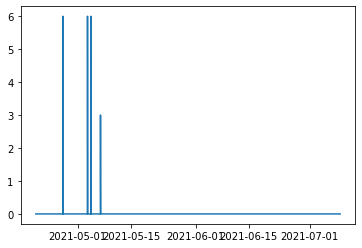

In [6]:
plt.plot(air_df.index, air_df.SO2)

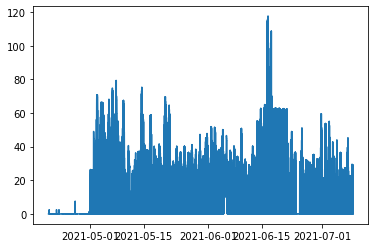

In [7]:
plt.plot(air_df.index, air_df.O3)

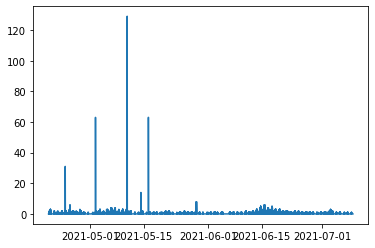

In [8]:
plt.plot(air_df.index, air_df.CO)

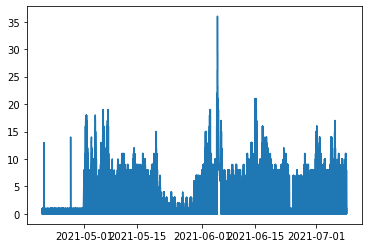

In [9]:
plt.plot(air_df.index, air_df.NO2)

In [10]:
weather_df = wrangle.wrangle_weather()

In [11]:
weather_df.dewpoint_celsius.isna().sum()

0

In [12]:
weather_df['wind'] = weather_df['wind'].str.extract('(\d+)', expand=False)
weather_df['visibility'] = weather_df['visibility'].str.extract('(\d+)', expand=False)
weather_df['wind'] = weather_df['wind'].fillna(0)
weather_df['wind'] = weather_df['wind'].apply(lambda x: int(x))
weather_df['visibility'] = weather_df['visibility'].apply(lambda x: int(x))

In [13]:
weather_df.describe()

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,wind,visibility
count,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000,125956.000000
mean,26.874559,80.357244,72.845417,17.168157,57.171157,802.154355,9.152966,9.503549
std,5.460621,9.810163,17.901945,8.587488,27.271507,374.900004,4.602754,1.556126
min,-307.000000,-521.000000,14.000000,-307.111201,-520.800163,0.000000,0.000000,0.000000
25%,24.000000,74.000000,59.940000,17.253116,63.055609,973.000000,6.000000,10.000000
50%,26.000000,78.530000,78.000000,20.932030,69.677654,976.000000,9.000000,10.000000
75%,30.000000,86.000000,88.000000,22.620397,72.716714,979.000000,12.000000,10.000000
max,180.000000,355.000000,121.000000,176.094879,348.970782,5076.000000,30.000000,10.000000


In [14]:
air_df.describe()

,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,hour,weekday,CO_24hr,Pm_25_24hr,Pm_10_24hr
count,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.000000,106287.00000,106287.000000,106287.000000,106287.000000
mean,21.380564,13.072906,12.010302,0.000292,6.262544,0.179702,1.581764,11.369415,2.95737,0.179702,13.072906,12.010302
std,897.298097,165.756299,86.612107,0.035638,15.068418,1.102288,3.211028,6.863005,2.00543,0.178548,16.503164,8.523272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.00000,0.069444,5.991898,6.766204
50%,6.000000,7.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.00000,0.119792,8.115741,9.270255
75%,12.000000,13.000000,16.000000,0.000000,0.000000,0.000000,1.000000,17.000000,5.00000,0.213889,13.141204,14.222801
max,65288.000000,16387.000000,16180.000000,6.000000,117.530000,129.000000,36.000000,23.000000,6.00000,0.833333,96.275942,51.232295


In [15]:
def full_daily_COSA_dataframe():
    sound_df = wrangle.wrangle_sound()
    sound_df = sound_df.set_index('DateTime')
    sound_df = sound_df.sort_index()
    flood_df = wrangle.clean_flood()
    flood_df = flood_df.set_index('datetime')
    weather_df = wrangle.wrangle_weather()
    air_df = wrangle.clean_air()
    air_df.datetime = pd.to_datetime(air_df.datetime)
    air_df = air_df.set_index('datetime')
    air_df = air_df.sort_index()
    weather_day_df = weather_df.resample('D', on='datetime').mean()
    flood_day_df = flood_df.resample('D').mean()
    sound_day_df = sound_df.resample('D').mean()
    air_day_df = air_df.resample('D').mean().drop(columns = ['hour', 'weekday', 'CO_24hr', 'Pm_25_24hr', 'Pm_10_24hr', 'SO2', 'O3', 'NO2'])
    air2_5 = air_df.drop(air_df.columns.difference(['Pm2_5', 'AQI_pm2_5']), 1)
    air10 = air_df.drop(air_df.columns.difference(['Pm10', 'AQI_pm10']), 1)
    airCO = air_df.drop(air_df.columns.difference(['CO', 'AQI_CO']), 1)
    series2_5 = air2_5.resample('D').max().rename(columns = {'AQI_pm2_5': 'most_hazardous_pm2.5_level'})['most_hazardous_pm2.5_level']
    series10 = air10.resample('D').max().rename(columns = {'AQI_pm10': 'most_hazardous_pm10_level'})['most_hazardous_pm10_level']
    seriesCO = airCO.resample('D').max().rename(columns = {'AQI_CO': 'most_hazardous_CO_level'})['most_hazardous_CO_level']
    hazards = pd.DataFrame(series2_5).join(series10).join(seriesCO)
    df = weather_day_df.join(air_day_df).join(hazards).join(sound_day_df).join(flood_day_df)
    df = df.round({'celsius': 2, 'farenheit': 2, 'humidity': 2, 'dewpoint_celsius': 2, 'dewpoint_farenheit': 2,
          'pressure': 2, 'NoiseLevel_db': 2, 'sensor_to_water_feet': 2, 'sensor_to_water_meters': 2,
          'sensor_to_ground_feet': 2, 'sensor_to_ground_meters': 2, 'flood_depth_feet': 2,
          'flood_depth_meters': 2})
    return df

In [16]:
df = wrangle.full_daily_COSA_dataframe()

In [17]:
df

,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure,Pm1_0,Pm2_5,Pm10,CO,most_hazardous_pm2.5_level,most_hazardous_pm10_level,most_hazardous_CO_level,NoiseLevel_db,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters,AQI_CO,AQI_pm2_5,AQI_pm10
datetime,,,,,,,,,,,,,,,,,,,,,,,
2021-04-20,20.89,69.56,45.79,7.67,45.80,988.08,5.193732,8.022792,7.324786,0.299145,Hazardous,Good,Good,66.23,13.24,4.04,13.5,4.12,0.26,0.08,Good,Good,Good
2021-04-21,15.32,59.60,36.49,-0.31,31.43,985.50,2.968750,3.616477,4.460227,0.144886,Unhealthy,Moderate,Good,66.66,13.34,4.07,13.5,4.12,0.16,0.05,Good,Good,Good
2021-04-22,16.00,60.85,67.74,9.64,49.35,979.65,16.866477,18.247159,22.963068,0.056818,Unhealthy for Sensitive Groups,Moderate,Good,66.20,13.30,4.05,13.5,4.12,0.21,0.06,Good,Moderate,Good
2021-04-23,22.51,72.46,85.76,19.65,67.37,971.28,18.123563,19.209770,23.916667,0.166667,Unhealthy for Sensitive Groups,Moderate,Good,66.40,13.00,3.96,13.5,4.12,0.50,0.15,Good,Moderate,Good
2021-04-24,24.97,76.97,50.29,10.99,51.78,974.48,3.804533,4.458924,51.232295,0.405099,Moderate,Good,Hazardous,64.81,13.13,4.00,13.5,4.12,0.37,0.11,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04,27.62,81.82,77.85,19.10,61.03,813.44,5.982609,6.902029,8.548986,0.069565,Moderate,Good,Good,60.49,3.45,1.05,13.5,4.12,10.05,3.06,Good,Good,Good
2021-07-05,27.75,81.94,77.98,19.20,61.23,813.53,10.007536,10.895072,13.280580,0.069565,Moderate,Good,Good,61.75,3.46,1.06,13.5,4.12,10.04,3.06,Good,Good,Good
2021-07-06,25.34,77.71,88.19,19.22,61.21,811.91,9.242319,10.684638,12.732174,0.022609,Unhealthy for Sensitive Groups,Good,Good,64.71,3.82,1.16,13.5,4.12,9.68,2.95,Good,Good,Good


[Text(0.5, 1.0, 'Average PM 1.0 Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'PM 1.0 Level')]

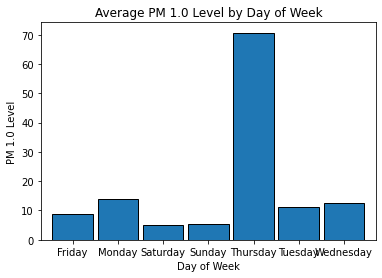

In [18]:
ax = df.Pm1_0.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM 1.0 Level by Day of Week', xlabel='Day of Week', ylabel='PM 1.0 Level')

[Text(0.5, 1.0, 'Average PM 2.5 Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'PM 2.5 Level')]

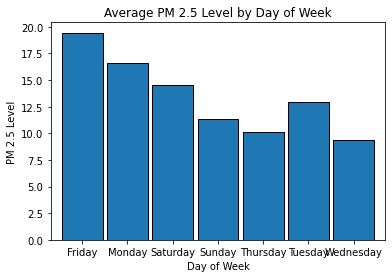

In [19]:
ax = df.Pm2_5.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM 2.5 Level by Day of Week', xlabel='Day of Week', ylabel='PM 2.5 Level')

[Text(0.5, 1.0, 'Average PM 10 Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'PM 10 Level')]

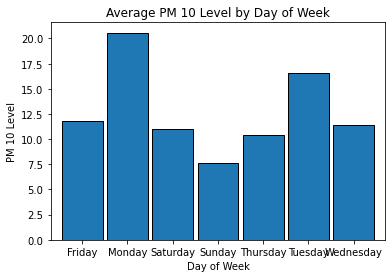

In [20]:
ax = df.Pm10.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM 10 Level by Day of Week', xlabel='Day of Week', ylabel='PM 10 Level')

[Text(0.5, 1.0, 'Average PM Carbon Monoxide Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'CO Level')]

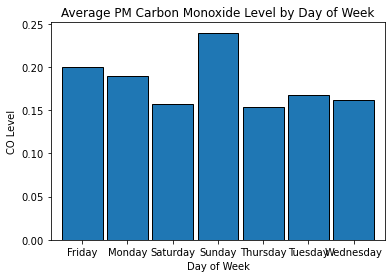

In [21]:
ax = df.CO.groupby(df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average PM Carbon Monoxide Level by Day of Week', xlabel='Day of Week', ylabel='CO Level')

### SAWS

In [22]:
saws_df = wrangle.wrangle_saws()
saws_df['year_month'] = '20' + saws_df['year_month']
saws_df['year_month'] = pd.to_datetime(saws_df['year_month'])
saws_month_year = saws_df.set_index('year_month').resample('M').mean().drop(columns = ['zipcode'])
saws_df

,zipcode,location,year_month,gallons_consumed,datetime
Record #,,,,,
274262,78229,ACCOLON DR,2017-01-01,6733,2017-01-01
274263,78229,ACCOLON DR,2017-01-01,5237,2017-01-01
274264,78229,ACCOLON DR,2017-01-01,2992,2017-01-01
274265,78229,ACCOLON DR,2017-01-01,0,2017-01-01
274266,78229,ACCOLON DR,2017-01-01,4489,2017-01-01
...,...,...,...,...,...
545917,78229,WOODLAKE DR,2020-12-01,748,2020-12-01
545918,78229,WOODLAKE DR,2020-12-01,14214,2020-12-01
545919,78229,WOODLAKE DR,2020-12-01,0,2020-12-01


In [23]:
saws_month_year

,gallons_consumed
year_month,
2017-01-31,3462.358907
2017-02-28,3214.546263
2017-03-31,3158.374053
2017-04-30,3350.766546
2017-05-31,4090.987158
2017-06-30,4284.356602
2017-07-31,4708.297662
2017-08-31,6075.917682
2017-09-30,4393.238722


<AxesSubplot:xlabel='year_month'>

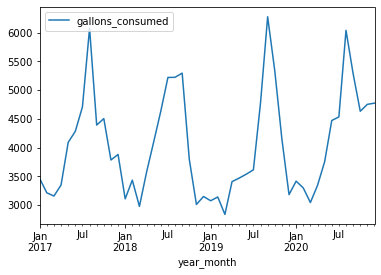

In [24]:
# Mean water consumption per month over 4 year period

saws_month_year.resample('M').mean().plot()

<AxesSubplot:xlabel='year_month'>

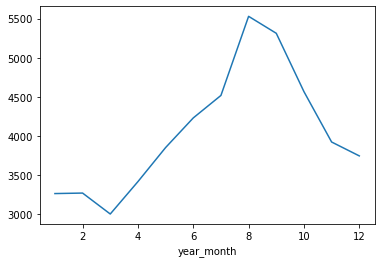

In [25]:
# Mean water consumption by month of the year

saws_df.gallons_consumed.groupby(saws_df['year_month'].dt.month).mean().plot()

<AxesSubplot:xlabel='year_month'>

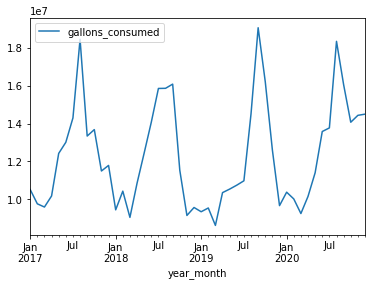

In [26]:
# Sum of monthly water consumption each month over 4 years

saws_month_year_sum = saws_df.set_index('year_month').resample('M').sum().drop(columns = ['zipcode'])
saws_month_year_sum.plot()

In [27]:
# Grouping the data by the street the property is located on

saws_places = saws_df.groupby('location').mean()
saws_places

,zipcode,gallons_consumed
location,,
ACCOLON DR,78229.0,3059.862500
ALI AVE,78229.0,1085.975794
ALLEGHENY DR,78229.0,2906.063068
ARANSAS BAY,78229.0,2148.131944
ASHTON PLACE,78229.0,8657.685268
...,...,...
WESTBORO,78229.0,6841.107639
WINDMILL HILL,78229.0,7432.047619
WINNETKA,78229.0,3111.862500


<AxesSubplot:xlabel='location', ylabel='gallons_consumed'>

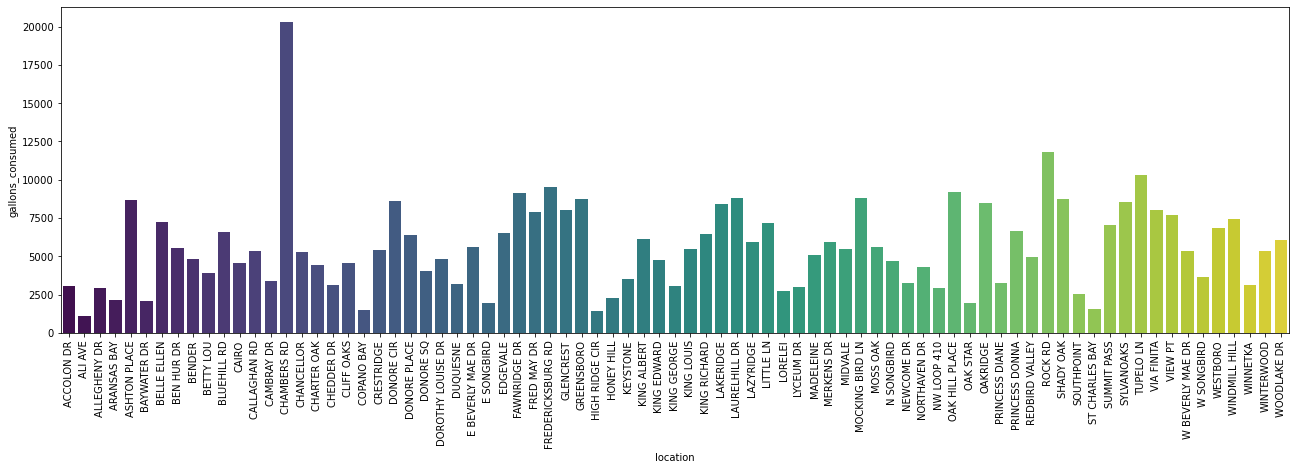

In [28]:
# Plot showing the average monthly water consumption by street

saws_places = saws_df.groupby('location').mean()
saws_places = saws_places.drop(columns =['zipcode'])
plt.subplots(figsize=(22, 6))
plt.xticks(rotation = 90)
sns.barplot(data = saws_places, x = saws_places.index, y = 'gallons_consumed', palette = "viridis")

In [29]:
saws_places_sum = saws_df.groupby('location').sum()
saws_places_sum

,zipcode,gallons_consumed
location,,
ACCOLON DR,56324880,2203101
ALI AVE,788548320,10946636
ALLEGHENY DR,413049120,15344013
ARANSAS BAY,67589856,1855986
ASHTON PLACE,105139776,11635929
...,...,...
WESTBORO,67589856,5910717
WINDMILL HILL,52569888,4994336
WINNETKA,56324880,2240541


<AxesSubplot:xlabel='location', ylabel='gallons_consumed'>

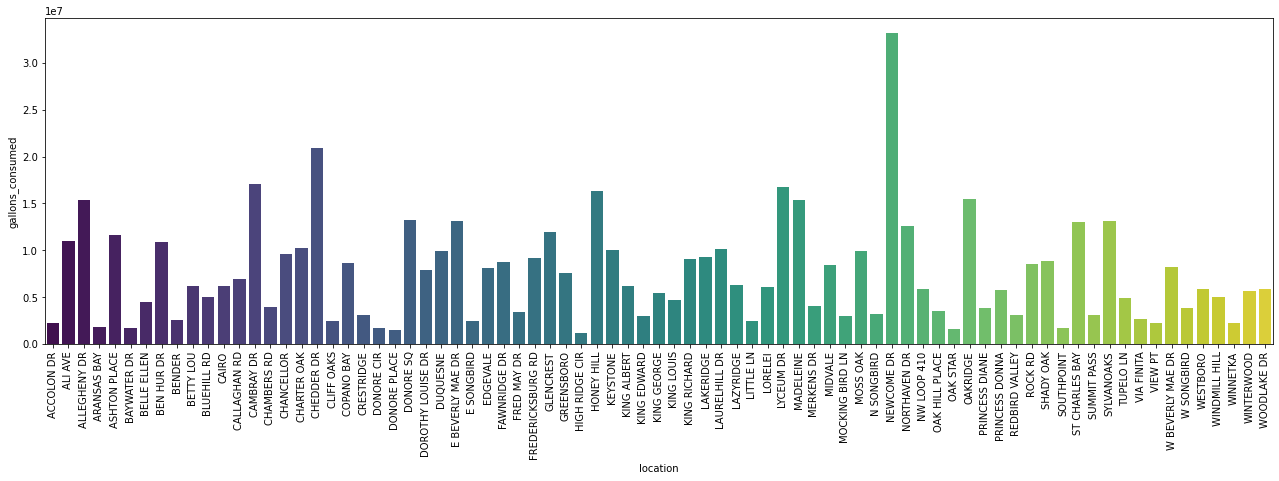

In [30]:
# Plot showing the sum monthly water consumption by street

saws_places = saws_df.groupby('location').mean()
saws_places = saws_places.drop(columns =['zipcode'])
plt.subplots(figsize=(22, 6))
plt.xticks(rotation = 90)
sns.barplot(data = saws_places_sum, x = saws_places.index, y = 'gallons_consumed', palette = "viridis")

# Sound

In [31]:
sound_df = wrangle.wrangle_sound()
sound_df = sound_df.set_index('DateTime')
sound_df = sound_df.sort_index()

In [32]:
sound_df.describe()

,NoiseLevel_db
count,106287.000000
mean,63.731388
std,6.253899
min,49.000000
25%,59.000000
50%,64.000000
75%,68.000000
max,111.000000


<AxesSubplot:xlabel='DateTime', ylabel='NoiseLevel_db'>

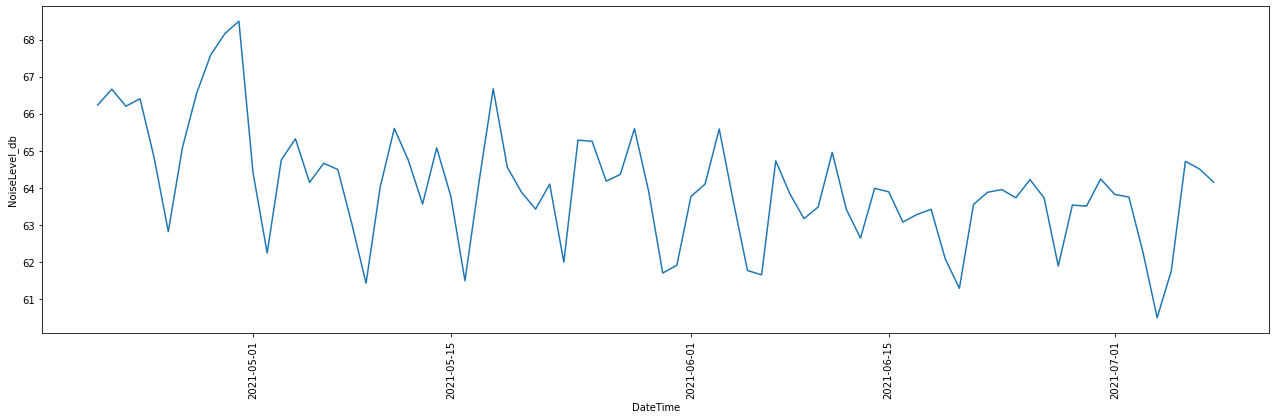

In [33]:
# Plot showing the average daily sound

plt.subplots(figsize=(22, 6))
plt.xticks(rotation = 90)
sns.lineplot(data = sound_df.resample('D').mean(), x = sound_df.resample('D').mean().index, y = 'NoiseLevel_db', palette = "magma")

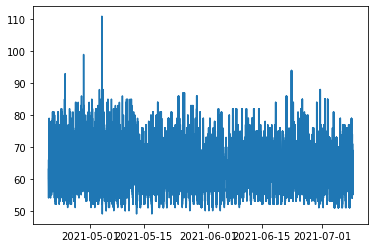

In [34]:
plt.plot(sound_df.index, sound_df.NoiseLevel_db)

In [35]:
hourly_sound = sound_df.resample('H').mean()
hourly_sound

,NoiseLevel_db
DateTime,
2021-04-20 00:00:00,60.000000
2021-04-20 01:00:00,66.500000
2021-04-20 02:00:00,67.222222
2021-04-20 03:00:00,68.500000
2021-04-20 04:00:00,65.111111
...,...
2021-07-08 19:00:00,66.855072
2021-07-08 20:00:00,68.097222
2021-07-08 21:00:00,64.111111


<AxesSubplot:xlabel='DateTime', ylabel='NoiseLevel_db'>

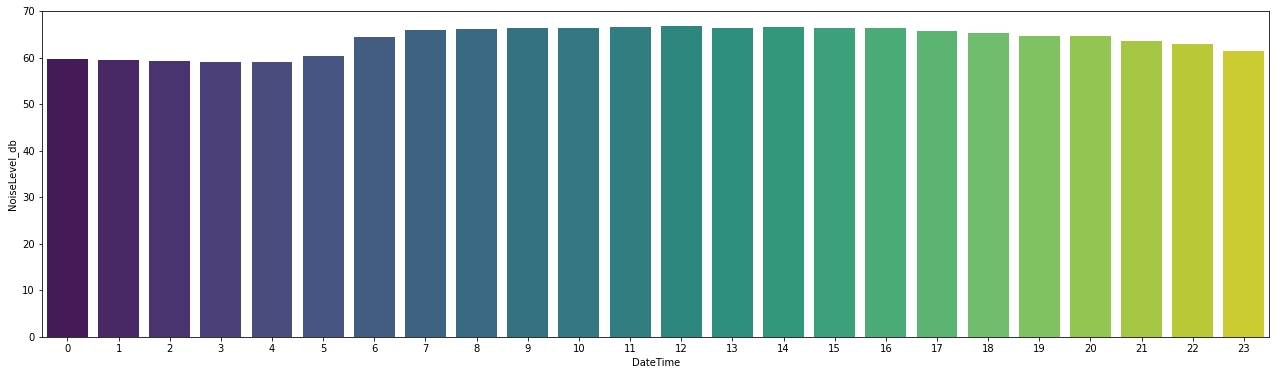

In [36]:
# Plot of average sound levels by hour of the day

hourly_sound = sound_df.resample('H').mean()
hour_of_day_sound = hourly_sound.groupby(hourly_sound.index.hour).mean()
plt.subplots(figsize=(22, 6))
sns.barplot(data = hour_of_day_sound, x = hour_of_day_sound.index, y = 'NoiseLevel_db', palette = "viridis")

<AxesSubplot:xlabel='DateTime', ylabel='NoiseLevel_db'>

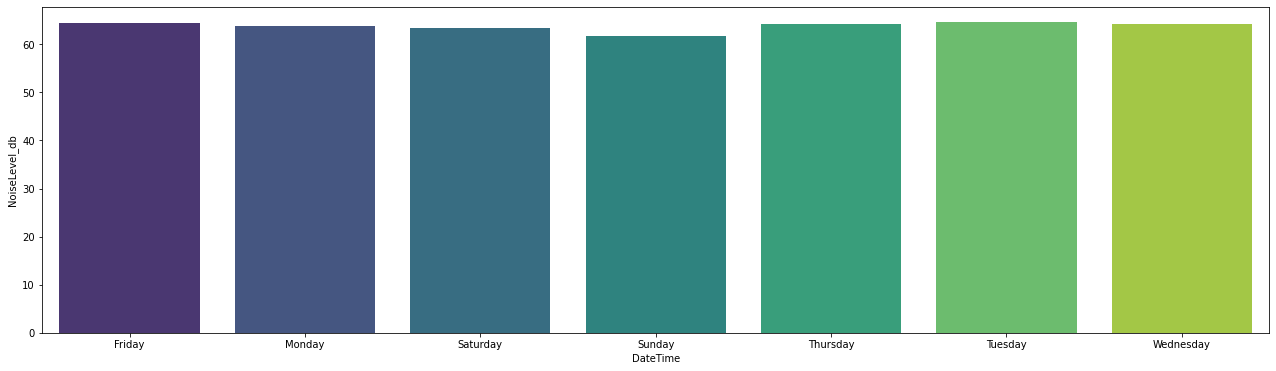

In [37]:
sound_by_day = sound_df.groupby(sound_df.index.day_name()).mean()
plt.subplots(figsize=(22, 6))
sns.barplot(data = sound_by_day, x = sound_by_day.index, y = 'NoiseLevel_db', palette = "viridis")

# Flood

In [38]:
flood_df = wrangle.clean_flood()
flood_df = flood_df.set_index('datetime')
flood_df.describe()

,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
count,27554.000000,27554.000000,2.755400e+04,2.755400e+04,27554.000000,27554.000000
mean,3.762779,1.146894,1.350066e+01,4.115000e+00,9.737877,2.968106
std,5.675450,1.729878,7.494991e-08,1.826128e-12,5.675450,1.729878
min,0.000000,0.000000,1.350066e+01,4.115000e+00,0.016404,0.005000
25%,0.225000,0.068600,1.350066e+01,4.115000e+00,0.639764,0.195000
50%,0.275000,0.083800,1.350066e+01,4.115000e+00,13.225656,4.031200
75%,12.860892,3.920000,1.350066e+01,4.115000e+00,13.275656,4.046400
max,13.484252,4.110000,1.350066e+01,4.115000e+00,13.500656,4.115000


<AxesSubplot:xlabel='datetime'>

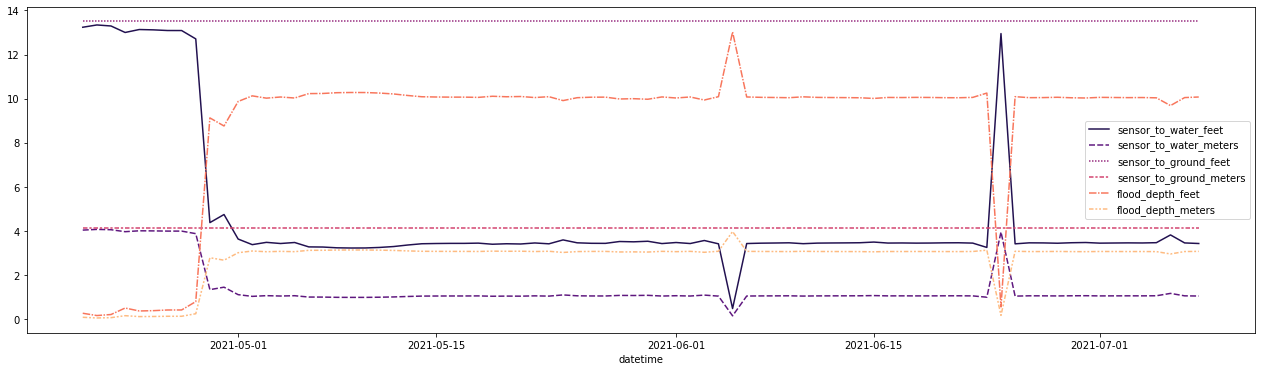

In [39]:
plt.subplots(figsize=(22, 6))
sns.lineplot(data = flood_df.resample('D').mean(), palette = "magma")

# Air

In [50]:
air_df = wrangle.clean_air()
air_df.datetime = pd.to_datetime(air_df.datetime)
air_df = air_df.set_index('datetime')
air_df = air_df.sort_index()

<AxesSubplot:xlabel='datetime', ylabel='Pm1_0'>

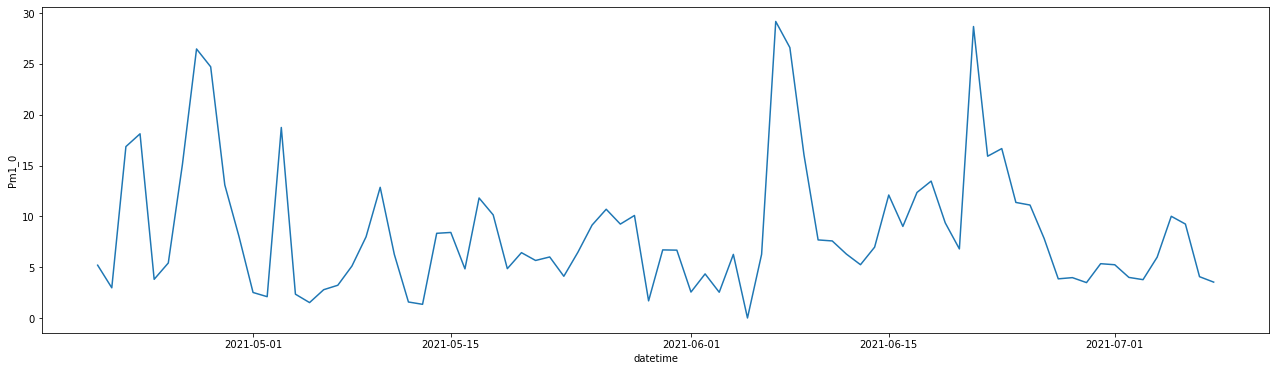

In [51]:
air1_df = air_df[(air_df['Pm1_0'] < 500) & (air_df['Pm1_0'] > -50)]
air1_day_df = air1_df.resample('D').mean()
plt.subplots(figsize=(22, 6))
sns.lineplot(data = air1_day_df, x = air1_day_df.index, y = 'Pm1_0', palette = "magma")

<AxesSubplot:xlabel='DateTime', ylabel='Pm1_0'>

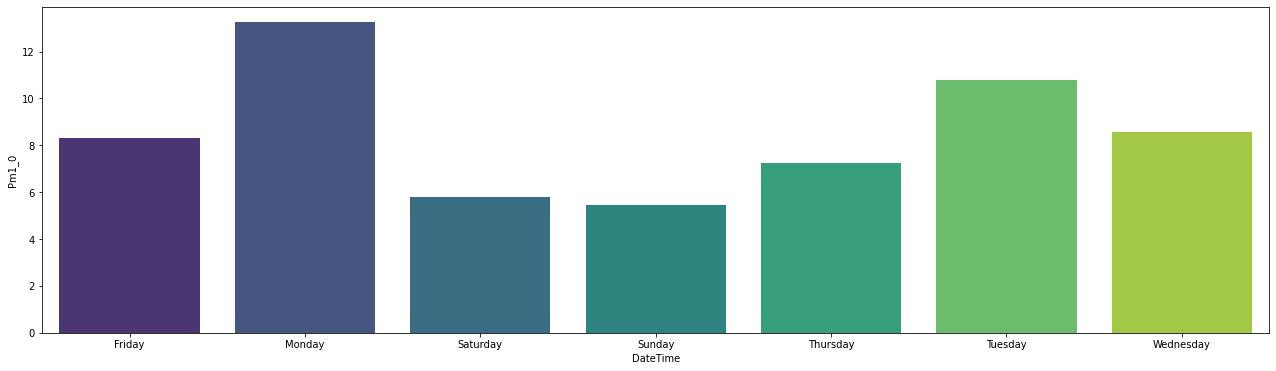

In [57]:
air_df = air_df[(air_df['Pm1_0'] < 500) & (air_df['Pm1_0'] > -50)]
air_df = air_df[(air_df['Pm2_5'] < 500) & (air_df['Pm2_5'] > -50)]
air_df = air_df[(air_df['Pm10'] < 500) & (air_df['Pm10'] > -50)]
air_by_day = air_df.groupby(air_df.index.day_name()).mean()
plt.subplots(figsize=(22, 6))
sns.barplot(data = air_by_day, x = sound_by_day.index, y = 'Pm1_0', palette = "viridis")

<AxesSubplot:xlabel='DateTime', ylabel='Pm2_5'>

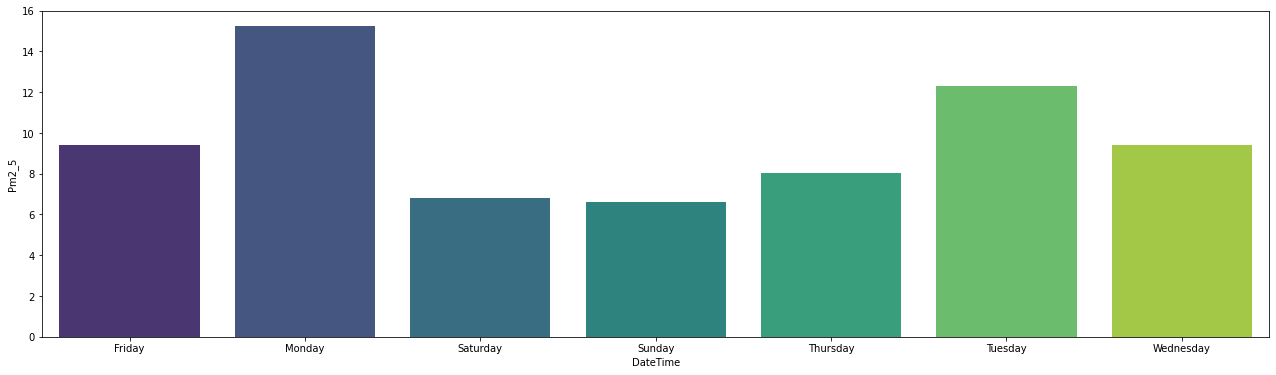

In [58]:
plt.subplots(figsize=(22, 6))
sns.barplot(data = air_by_day, x = sound_by_day.index, y = 'Pm2_5', palette = "viridis")

<AxesSubplot:xlabel='DateTime', ylabel='Pm10'>

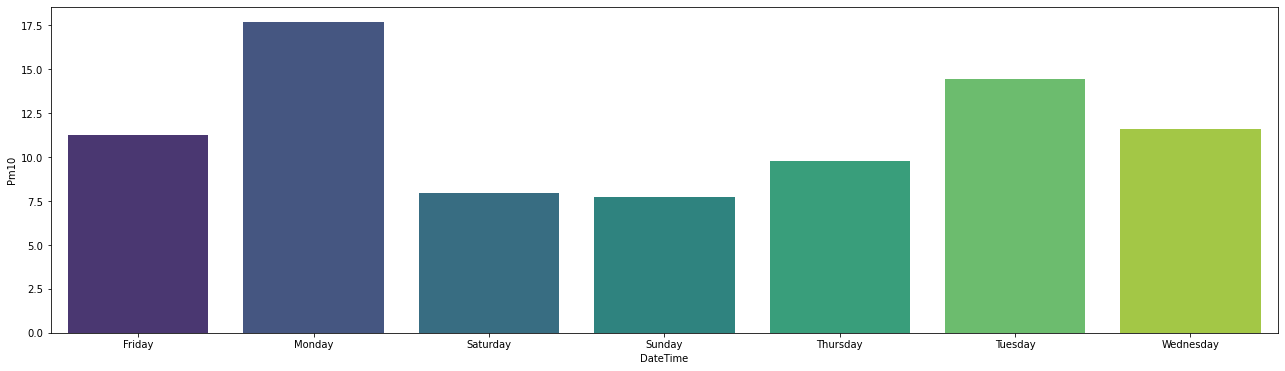

In [59]:
plt.subplots(figsize=(22, 6))
sns.barplot(data = air_by_day, x = sound_by_day.index, y = 'Pm10', palette = "viridis")

<AxesSubplot:xlabel='DateTime', ylabel='CO'>

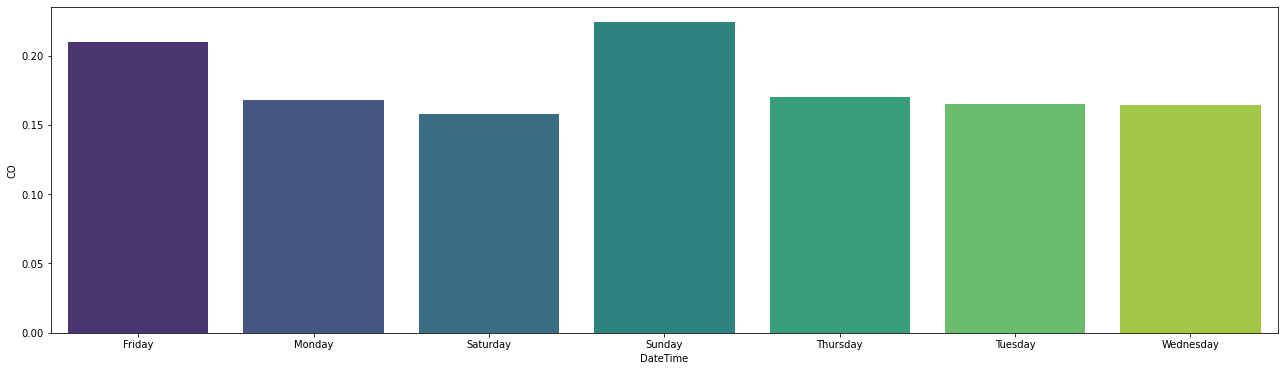

In [60]:
plt.subplots(figsize=(22, 6))
sns.barplot(data = air_by_day, x = sound_by_day.index, y = 'CO', palette = "viridis")